<a href="https://colab.research.google.com/github/mlvlab/DFE604-2020F/blob/master/1_Data_Loading_Loan_Data_from_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals 
-----
* Find a dataset on Kaggle, Internet, or prepare your own dataset
* Store your csv file on Google Drive
* Load your data on Colab
* Calculate basic statistics of your data
* Remove unnecessary columns or rows (preprocessing)

References
-----
* [Load Data from Kaggle](https://www.kaggle.com/zhijinzhai/loandata)
* [csv reader](https://docs.python.org/3/library/csv.html)


In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/DFE604-2021F/'

/content/drive/My Drive/Colab Notebooks/DFE604-2021F


In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/DFE604-2021F'

In [ ]:
ls

'DFC605 - 1. Data Loading : Loan Data from Kaggle.ipynb'
'Loan payments data.csv'


In [ ]:
import csv

In [ ]:
with open('Loan payments data.csv', newline='') as csvfile:
  csvreader = csv.reader(csvfile, delimiter=',')
  for row in csvreader:
    print(','.join(row))

Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,,45,High School or Below,male
xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,,50,Bechalor,female
xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,,33,Bechalor,female
xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,,27,college,male
xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,,28,college,female
xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,,35,Master or Above,male
xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,,29,college,male
xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,,36,college,male
xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,,28,college,male
xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,,26,college,male
xqd20160011,PAIDOFF,300,7,9/10/2016,9/16/2016,9/11/2016 19:11,,29,

In [ ]:
row

['xqd20160500',
 'COLLECTION_PAIDOFF',
 '1000',
 '30',
 '9/12/2016',
 '10/11/2016',
 '10/19/2016 11:58',
 '8',
 '28',
 'High School or Below',
 'male']

In [ ]:
type(row)

list

In [ ]:
rows = []
with open('Loan payments data.csv', newline='') as csvfile:
  csvreader = csv.reader(csvfile, delimiter=',')
  for row in csvreader:
    rows.append(row)

csvheader = rows[0]
csvdata = rows[1:]

In [ ]:
icol = 10

In [ ]:
set([sample[icol] for sample in csvdata])

{'female', 'male'}

In [ ]:
column = [sample[icol] for sample in csvdata]

In [ ]:
from collections import Counter

In [ ]:
c = Counter(column)

In [ ]:
labels = list(c.keys())
counts = list(c.values())

In [ ]:
counts

[423, 77]

In [ ]:
labels

['male', 'female']

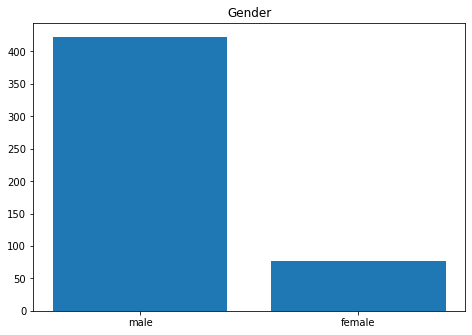

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,counts)
plt.title('Gender')
plt.show()

In [ ]:
labels

['male', 'female']

In [ ]:
values = [1,-1]

In [ ]:
labels_and_vals = zip(labels, values)

In [ ]:
mapping={}
for k, v in zip(labels, values):
  mapping[k] = v

In [ ]:
mapping

{'female': -1, 'male': 1}

In [ ]:
num_column =[] 
for v in column:
  num_column.append(mapping[v])

In [ ]:
num_column[:10], column[:10]

([1, -1, -1, 1, -1, 1, 1, 1, 1, 1],
 ['male',
  'female',
  'female',
  'male',
  'female',
  'male',
  'male',
  'male',
  'male',
  'male'])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Loan payments data.csv', delimiter = ',')

In [ ]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [ ]:
df['Gender']

0        male
1      female
2      female
3        male
4      female
        ...  
495      male
496      male
497      male
498    female
499      male
Name: Gender, Length: 500, dtype: object

In [ ]:
df_female = df[df['Gender']=='female']

In [ ]:
df_female

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
13,xqd20160014,PAIDOFF,900,7,9/10/2016,9/16/2016,9/13/2016 21:57,NaN,26,college,female
21,xqd20160022,PAIDOFF,1000,30,9/10/2016,10/9/2016,10/8/2016 17:09,NaN,43,High School or Below,female
...,...,...,...,...,...,...,...,...,...,...,...
465,xqd20169466,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/12/2016 12:54,1.0,49,High School or Below,female
474,xqd20160475,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/28/2016 11:34,2.0,26,High School or Below,female
475,xqd20160476,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,11/9/2016 18:12,29.0,35,college,female
476,xqd20160477,COLLECTION_PAIDOFF,800,15,9/12/2016,10/26/2016,10/31/2016 13:07,5.0,46,college,female


In [ ]:
df_copied = df

In [ ]:
df_copied.replace('male', 1, inplace=True)

In [ ]:
df_copied.replace('female', -1, inplace=True)

In [ ]:
df_copied

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,-1
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,-1
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,-1
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,1
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,1
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,1
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,-1


In [ ]:
df_copied.to_csv('Loan_payments_data_pandas_test.csv')